Import libs

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import imageio
from IPython.display import Image
%matplotlib inline

Read in data

In [8]:
df_exp = pd.read_excel('gapminder_lifeexpectancy.xlsx')
df_exp.shape
#218 years

(260, 218)

In [3]:
df_pop = pd.read_excel('gapminder_population.xlsx')
#df_pop.columns
#82 years instead of 218 (as in data above)

In [5]:
df_cont = pd.read_csv('continents.csv', sep=';')
#df_cont
#df of continents, groupby to organise

In [13]:
#rename col to merge on

df_exp = df_exp.rename({'Life expectancy': 'country'}, axis=1)
df_exp.columns

#merge to get continents for countries
df_mergedexp = pd.merge(df_cont,df_exp,how='inner', on='country')
#df_mergedexp

In [12]:
#melt to get years in long format

df_meltexp =df_mergedexp.melt(
    id_vars = ["country",'continent'],
    #value_vars = [""],
    var_name = "Year",
    value_name = "Life_expectancy"
)
df_meltexp

,country,continent,Year,Life_expectancy
0,Algeria,Africa,1800.0,28.82
1,Angola,Africa,1800.0,26.98
2,Benin,Africa,1800.0,31.00
3,Botswana,Africa,1800.0,33.60
4,Burundi,Africa,1800.0,31.50
...,...,...,...,...
38187,Paraguay,South America,2016.0,74.50
38188,Peru,South America,2016.0,79.70
38189,Suriname,South America,2016.0,72.20
38190,Uruguay,South America,2016.0,77.00


In [16]:
#Pop col-> country, in order to merge on country (to visualise population, per year)
df_pop.rename(columns={'Total population': 'country'}, inplace=True)
df_mergedpop = pd.merge(df_cont,df_pop,how='inner', on='country')

#melt in order to get long format of population (for vis)
df_meltpop =df_mergedpop.melt(
    id_vars = ["country",'continent'],
    #value_vars = [""],
    var_name = "Year",
    value_name = "Population"
)
df_meltpop

#df["population"] = (df["population"]/1000 000).astype(int)
#population overwritten and divided by 1000 000 to make more readable, and change type

,country,continent,Year,Population
0,Algeria,Africa,1800.0,2503218.0
1,Angola,Africa,1800.0,1567028.0
2,Benin,Africa,1800.0,636559.0
3,Botswana,Africa,1800.0,121000.0
4,Burundi,Africa,1800.0,899097.0
...,...,...,...,...
14251,Paraguay,South America,2015.0,6639123.0
14252,Peru,South America,2015.0,31376670.0
14253,Suriname,South America,2015.0,542975.0
14254,Uruguay,South America,2015.0,3431555.0


In [20]:
#same steps with fertility
df_fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)
df_fert.columns

#make cols same data type and rename ind to ensure seamless merging
df_fert.columns = df_fert.columns.astype(int)


df_fert.index.name = 'country'
df_fert.reset_index() #dropna for vis? 

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,5.93,5.91,5.88,5.85,5.81,5.77,5.73,5.69,5.64,5.59
257,Zimbabwe,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,...,3.94,3.90,3.85,3.79,3.72,3.64,3.56,3.49,3.41,3.35
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#merge fert with continents for animated scatter
df_mergedfert = pd.merge(df_cont,df_fert,how='inner', on='country')

#make into long format using melt
df_meltfert = df_mergedfert.melt(id_vars=['country', 'continent'], var_name='year', value_name='fertility_rate')

df_meltfert.rename(columns={'year': 'Year'}, inplace=True)
#n.b. year lower case here and upper case others -always do col rename in separate cell
df_meltfert


,country,continent,Year,fertility_rate
0,Algeria,Africa,1800,6.99
1,Angola,Africa,1800,6.93
2,Benin,Africa,1800,5.55
3,Botswana,Africa,1800,6.47
4,Burundi,Africa,1800,6.80
...,...,...,...,...
37795,Paraguay,South America,2015,2.80
37796,Peru,South America,2015,2.36
37797,Suriname,South America,2015,2.22
37798,Uruguay,South America,2015,2.03


In [27]:
#data wrangling step four: merging together the various long format (cols with same name and data should overlap?)

df_all = df_meltfert.merge(df_meltpop)
df_all =df_all.merge(df_meltexp)
df_all

,country,continent,Year,fertility_rate,Population,Life_expectancy
0,Algeria,Africa,1800,6.99,2503218.0,28.82
1,Angola,Africa,1800,6.93,1567028.0,26.98
2,Benin,Africa,1800,5.55,636559.0,31.00
3,Botswana,Africa,1800,6.47,121000.0,33.60
4,Burundi,Africa,1800,6.80,899097.0,31.50
...,...,...,...,...,...,...
14170,Paraguay,South America,2015,2.80,6639123.0,74.40
14171,Peru,South America,2015,2.36,31376670.0,79.50
14172,Suriname,South America,2015,2.22,542975.0,72.00
14173,Uruguay,South America,2015,2.03,3431555.0,76.80


EDA & Visualisation

Text(0, 0.5, 'Life Expectancy')

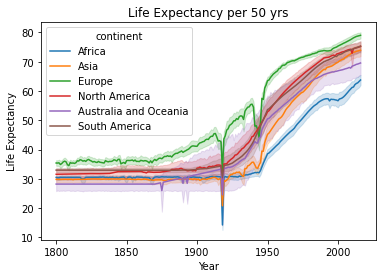

In [17]:
#Life expectancy visualisation
sns.lineplot(x='Year', y='Life_expectancy', data=df_meltexp, hue='continent').set_title("Life Expectancy per 50 yrs")

plt.xlabel('Year')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Population')

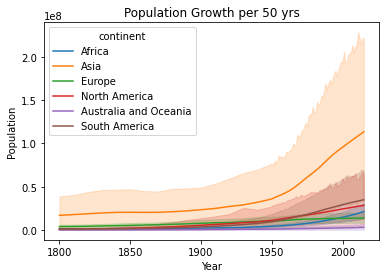

In [18]:
#Population growth visualisation
sns.lineplot(x='Year', y='Population', data=df_meltpop, hue='continent').set_title("Population Growth per 50 yrs")

plt.xlabel('Year')
plt.ylabel('Population')

Text(0, 0.5, 'Fertility')

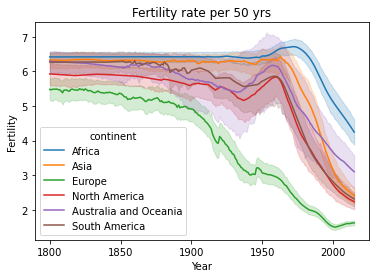

In [20]:
#Fertility rate visualisation
sns.lineplot(x='Year', y='fertility_rate', data=df_meltfert, hue='continent').set_title("Fertility rate per 50 yrs")

plt.xlabel('Year')
plt.ylabel('Fertility')
#fig.savefig("fertility_rate.png")

Text(0.5, 1.0, 'Correlation: Life Expectancy and Fertility Rate year 2000')

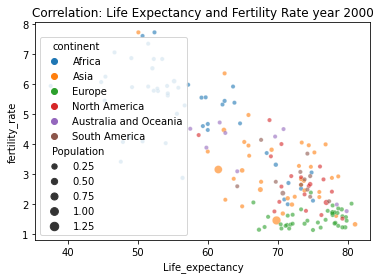

In [31]:
#Life expectancy year 2000
df_subset = df_all.loc[df_all['Year'] == 2000]
sns.scatterplot(x='Life_expectancy', y='fertility_rate',
            data=df_subset, alpha=0.6, size='Population', hue='continent').set_title("Correlation: Life Expectancy and Fertility Rate year 2000")

In [38]:
for a in range (1960, 2016):

    df_subset2 = df_all.loc[df_all['Year'] == a]
    snsplot= sns.scatterplot(x='Life_expectancy', y='fertility_rate',
            data=df_subset, alpha=0.6, size='Population', hue='continent')
    fig=snsplot.get_figure()
    fig.savefig('life_expectancy_'+str(a)+ '.png')
    plt.close()

In [35]:
df_all

,country,continent,Year,fertility_rate,Population,Life_expectancy
0,Algeria,Africa,1800,6.99,2503218.0,28.82
1,Angola,Africa,1800,6.93,1567028.0,26.98
2,Benin,Africa,1800,5.55,636559.0,31.00
3,Botswana,Africa,1800,6.47,121000.0,33.60
4,Burundi,Africa,1800,6.80,899097.0,31.50
...,...,...,...,...,...,...
14170,Paraguay,South America,2015,2.80,6639123.0,74.40
14171,Peru,South America,2015,2.36,31376670.0,79.50
14172,Suriname,South America,2015,2.22,542975.0,72.00
14173,Uruguay,South America,2015,2.03,3431555.0,76.80


Animated scatterplot 

(corr btwn Lifeexp and Fert, w population as size)

1) Create a plot for each year (using for loop)
2) Save each plot w year in filename
3) Use imageio to generate a gif

In [38]:
#1

for year in range(1960, 2016):
    df_subset = df_all.loc[df_all['Year'] == year] 
    sns.scatterplot(x='Life_expectancy', y='fertility_rate', data=df_subset, alpha=0.6, hue='country', size='Population', legend=False, edgecolor='black').set(title=year)    
    plt.axis(xmin=0, xmax=90, ymin=0, ymax=10)
    file_name = 'lifeexp_'+str(year)+'.png'
    plt.savefig(file_name)
    plt.close()

In [41]:
#2

images = []

for i in range(1960, 2016):
    filename = 'lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))
imageio.mimsave('output.gif', images, fps=20)

Life expectancy correlated with fertility, 1960-2016

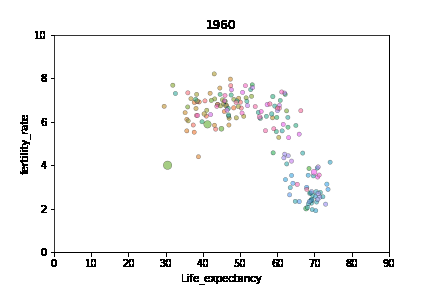

In [48]:
Image("output.gif")